In [1]:
import numpy as np
import math
import os
import matplotlib.pyplot as plt
from dr_spaam.detector import Detector
import ast

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ckpt = '/home/user1/CONVINCE/ros2_person_det_ws/weights/ckpt_jrdb_ann_dr_spaam_e20.pth'
detector = Detector(
    ckpt,
    model="DR-SPAAM",          # Or DR-SPAAM
    gpu=True,               # Use GPU
    stride=1,               # Optionally downsample scan for faster inference
    panoramic_scan=True     # Set to True if the scan covers 360 degree
)

# tell the detector field of view of the LiDAR
laser_fov_deg = 360
detector.set_laser_fov(laser_fov_deg)

In [3]:
data_path = 'data/r1/test' 
scan_csvs = [x for x in os.listdir(data_path) if x[-3:] == 'csv']

data = {}

for file_name in scan_csvs:
    bag_name = file_name[:-4]
    data[bag_name] = {}
    print(file_name)
    scans = []
    with open(f'{data_path}/{file_name}') as f_scan:
        for line in f_scan:
            split = line.split(',')
            scan_indx = int(split[0])
            string_scan = split[2:]
            scan_frame = [float(x) for x in string_scan]
            data[file_name[:-4]][scan_indx] = [np.array(scan_frame)]
            

    labels = []
    with open(f'{data_path}/{file_name[:-3]+"wp"}') as f_labels:
        for line in f_labels:
            label_list = line.split(',', 1)
            scan_indx = int(label_list[0])
            data[file_name[:-4]][scan_indx].append(ast.literal_eval(label_list[1]))


rosbag2_2023_05_25-12_05_21_converted.csv
rosbag2_2023_05_25-12_07_05_converted.csv
rosbag2_2023_05_25-12_01_27_converted.csv
rosbag2_2023_05_25-12_10_44_converted.csv


In [4]:
scan_frame, labels = data['rosbag2_2023_05_25-12_01_27_converted'][4900]
angles = np.linspace(-np.radians(laser_fov_deg/2), np.radians(laser_fov_deg/2), len(scan_frame))
x = scan_frame * -np.sin(angles)
y = scan_frame * np.cos(angles)

In [5]:
""" figure = plt.figure()
plt.plot(0, 0, 'ro')
angle = -180
resolution = (2 * math.pi) / len(scan_frame)
for r in scan_frame:
    if r == 8.2:
        angle += resolution
        continue 
    x = r * -math.sin(angle)
    y = r * math.cos(angle)
    print(x, y)
    plt.plot(x, y, 'ro', markersize=1)
    angle += resolution

for label in labels:
    print(label)
    #y = label[0] * math.sin(label[1])
    #x = -label[0] * math.cos(label[1])
    plt.plot(label[0], label[1], 'go', markersize=10, alpha=1)
 """

" figure = plt.figure()\nplt.plot(0, 0, 'ro')\nangle = -180\nresolution = (2 * math.pi) / len(scan_frame)\nfor r in scan_frame:\n    if r == 8.2:\n        angle += resolution\n        continue \n    x = r * -math.sin(angle)\n    y = r * math.cos(angle)\n    print(x, y)\n    plt.plot(x, y, 'ro', markersize=1)\n    angle += resolution\n\nfor label in labels:\n    print(label)\n    #y = label[0] * math.sin(label[1])\n    #x = -label[0] * math.cos(label[1])\n    plt.plot(label[0], label[1], 'go', markersize=10, alpha=1)\n "

In [6]:
dets_xy, dets_cls, instance_mask = detector(scan_frame)

/home/user1/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:306: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv1d(input, weight, bias, self.stride,


[2.1182748118504606, 2.810507901335483]
[1.7296432344512374, -2.503578035858507]
[2.4812095122562647, -2.905641925438045]
[2.4812095122562647, -2.905641925438045]



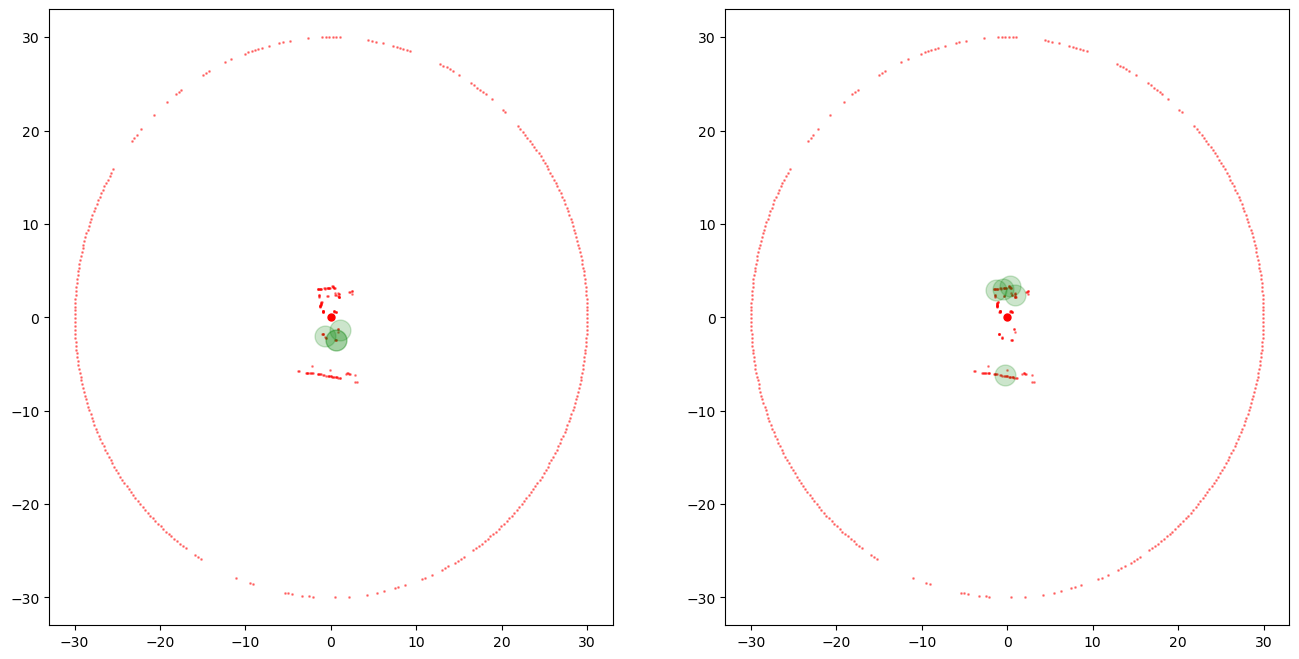

In [11]:
figure = plt.figure(figsize=(16,8))  # Set the figure size
labelled_plot = figure.add_subplot(121)  # Add the first subplot (1 row, 2 columns, 1st subplot)
predicted_plot = figure.add_subplot(122)  # Add the second subplot (1 row, 2 columns, 2nd subplot)


labelled_plot.plot(0, 0, 'ro', markersize=5)
predicted_plot.plot(0, 0, 'ro', markersize=5)
labelled_plot.plot(x, y, 'ro', markersize=1, alpha=0.4)
predicted_plot.plot(x, y, 'ro', markersize=1, alpha=0.4)

for label in labels:
    print(label)
    label_x = label[0] * -np.sin(label[1])
    label_y = label[0] * np.cos(label[1])
    labelled_plot.plot(label_x, label_y, 'go', markersize=15, alpha=0.2)

print('')
dets = dets_xy[dets_cls > 0.7]
for det in dets:
    predicted_plot.plot(-det[1], det[0], 'go', markersize=15, alpha=0.2)

In [8]:
dets_cls

array([9.9898916e-01, 9.9503243e-01, 9.9154741e-01, 9.8160928e-01,
       9.2813104e-01, 2.1226691e-01, 8.9887872e-02, 8.3905429e-02,
       5.5758864e-02, 8.9385239e-03, 5.7616583e-03, 4.8761717e-03,
       3.1118058e-03, 1.8640014e-03, 1.7117561e-03, 6.1938516e-04,
       4.8234899e-04, 2.5633496e-04, 2.4864697e-04, 1.9407543e-04,
       1.5896675e-04, 1.2533118e-04, 1.0818998e-04, 6.2873194e-05,
       5.9747203e-05, 5.5298227e-05, 5.3086969e-05, 4.0224018e-05,
       3.9523162e-05, 3.5221234e-05, 3.1899661e-05, 3.1899661e-05,
       3.1899661e-05, 3.1899661e-05, 3.1899661e-05, 3.1899661e-05,
       3.1899661e-05, 3.1899661e-05, 3.1899661e-05, 3.1899661e-05,
       3.1899661e-05, 3.1899661e-05, 3.1899661e-05, 3.1899661e-05,
       3.1899661e-05, 3.1899661e-05, 3.1899661e-05, 3.1899661e-05,
       3.1899661e-05, 3.1899661e-05, 3.1899661e-05, 3.1899661e-05,
       3.1899661e-05, 3.1899661e-05, 3.1899661e-05, 3.1899661e-05,
       3.1899661e-05, 3.1899661e-05, 3.1899661e-05, 3.1899661e